# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidance to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this intire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to similate what you will face when you are out in the wild. 

Happy Coding!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
data = pd.read_csv('../files/AB_NYC_2019.csv')
data
for col in data.columns:
    print(col)

id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


In [81]:
# Which hosts are busiest and why?
    # Compile pertinent host facts
host_data = {
    'Host_ID': data.host_id,
    'Host_Name': data.host_name,
    'Listings_Count': data.calculated_host_listings_count,
    'Availability': data.availability_365
}

host = pd.DataFrame.from_dict(host_data)
host

,Host_ID,Host_Name,Listings_Count,Availability
0,2787,John,6,365
1,2845,Jennifer,2,355
2,4632,Elisabeth,1,365
3,4869,LisaRoxanne,1,194
4,7192,Laura,1,0
...,...,...,...,...
48890,8232441,Sabrina,2,9
48891,6570630,Marisol,2,36
48892,23492952,Ilgar & Aysel,1,27
48893,30985759,Taz,6,2


In [82]:
# Operating on the logic that hosts with the highest number of listings
    # are busiest as they have the highest turnover rates, sort the DataFrame by listings
busiest = host.sort_values(by=['Listings_Count'], ascending=False)

# Get the top 10 busiest hosts
busiest.head(10)

,Host_ID,Host_Name,Listings_Count,Availability
39773,219517861,Sonder (NYC),327,332
41463,219517861,Sonder (NYC),327,289
41469,219517861,Sonder (NYC),327,255
38294,219517861,Sonder (NYC),327,219
41468,219517861,Sonder (NYC),327,351
43741,219517861,Sonder (NYC),327,357
47691,219517861,Sonder (NYC),327,339
41467,219517861,Sonder (NYC),327,302
47692,219517861,Sonder (NYC),327,342
41466,219517861,Sonder (NYC),327,318


In [91]:
# Sonder hosts multiple locations all with high numbers of listings and availabilities makeing Sonder the busiest host.
# Drop all the duplicates to successfully get the top ten.
busiest.drop_duplicates(subset ='Host_ID', keep ='first', inplace=True)
busiest.head(10)

,Host_ID,Host_Name,Listings_Count,Availability
39773,219517861,Sonder (NYC),327,332
38701,107434423,Blueground,232,293
13039,30283594,Kara,121,352
42840,137358866,Kazuya,103,223
33464,12243051,Sonder,96,220
41896,16098958,Jeremy & Laura,96,306
28582,61391963,Corporate Housing,91,310
16433,22541573,Ken,87,365
34296,200380610,Pranjal,65,364
4516,1475015,Mike,52,311


In [94]:
# How many neighborhood groups are available and which shows up the most?
neighborhood_data = {
    'Neighbourhood_Group': data.neighbourhood_group,
    'Neighbourhood': data.neighbourhood,
}

neighborhoods = pd.DataFrame.from_dict(neighborhood_data)
neighborhoods


,Neighbourhood_Group,Neighbourhood
0,Brooklyn,Kensington
1,Manhattan,Midtown
2,Manhattan,Harlem
3,Brooklyn,Clinton Hill
4,Manhattan,East Harlem
...,...,...
48890,Brooklyn,Bedford-Stuyvesant
48891,Brooklyn,Bushwick
48892,Manhattan,Harlem
48893,Manhattan,Hell's Kitchen


In [96]:
# Remove duplicate neighborhood groups.
neighborhoods.drop_duplicates(subset ='Neighbourhood_Group', keep ='first', inplace=True)
neighborhoods

,Neighbourhood_Group,Neighbourhood
0,Brooklyn,Kensington
1,Manhattan,Midtown
46,Queens,Long Island City
169,Staten Island,St. George
171,Bronx,Highbridge


In [107]:
neighborhoods = pd.DataFrame.from_dict(neighborhood_data)
neighborhoods_occur = neighborhoods.groupby(['Neighbourhood_Group']).size()
neighborhoods_occur

Neighbourhood_Group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
dtype: int64

In [110]:
# Are private rooms the most popular in manhattan?


prvt_room_data = {
    'Neighbourhood_Group': data.neighbourhood_group,
    'Room_Type': data.room_type
}

pvt_rm = pd.DataFrame.from_dict(prvt_room_data)
pvt_rm


,Neighbourhood_Group,Room_Type
0,Brooklyn,Private room
1,Manhattan,Entire home/apt
2,Manhattan,Private room
3,Brooklyn,Entire home/apt
4,Manhattan,Entire home/apt
...,...,...
48890,Brooklyn,Private room
48891,Brooklyn,Private room
48892,Manhattan,Entire home/apt
48893,Manhattan,Shared room


In [115]:
prvt_rm_occur = pvt_rm.groupby(['Neighbourhood_Group','Room_Type']).size()
prvt_rm_occur

Neighbourhood_Group  Room_Type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
dtype: int64


In [123]:
# Which hosts are the busiest based on their reviews?
more_host_info = {
    'Host_ID': data.host_id,
    'Host_Name': data.host_name,
    'Number_Of_Reviews': data.number_of_reviews,
    'Last_Review': data.last_review,
    'Reviews_Per_Month': data.reviews_per_month
}

host_info = pd.DataFrame.from_dict(more_host_info)
host_info

,Host_ID,Host_Name,Number_Of_Reviews,Last_Review,Reviews_Per_Month
0,2787,John,9,2018-10-19,0.21
1,2845,Jennifer,45,2019-05-21,0.38
2,4632,Elisabeth,0,NaN,NaN
3,4869,LisaRoxanne,270,2019-07-05,4.64
4,7192,Laura,9,2018-11-19,0.10
...,...,...,...,...,...
48890,8232441,Sabrina,0,NaN,NaN
48891,6570630,Marisol,0,NaN,NaN
48892,23492952,Ilgar & Aysel,0,NaN,NaN
48893,30985759,Taz,0,NaN,NaN


In [125]:
reviews = host_info.sort_values(by=['Number_Of_Reviews'], ascending=False)
reviews.drop_duplicates(subset ='Host_ID', keep ='first', inplace=True)
reviews.head(10)

,Host_ID,Host_Name,Number_Of_Reviews,Last_Review,Reviews_Per_Month
11759,47621202,Dona,629,2019-07-05,14.58
2031,4734398,Jj,607,2019-06-21,7.75
10623,37312959,Maya,543,2019-07-01,11.59
1879,2369681,Carol,540,2019-07-06,6.95
20403,26432133,Danielle,510,2019-07-06,16.22
4870,12949460,Asa,488,2019-07-01,8.14
471,792159,Wanda,480,2019-07-07,6.70
1271,2680820,Linda,474,2019-05-25,5.53
113,42273,Dani,467,2018-12-30,4.22
8001,23591164,Angela,466,2019-06-22,9.16


In [144]:
#Which neighorhood group has the highest average price?
%matplotlib inline

find_averages =  {
    'Neighborhood_Group' : [data.neighbourhood_group],
    'Prices' : [data.price]
}
df = pd.DataFrame(find_averages, index=[data.neighbourhood_group])
df.sort_values('Neighborhood_Group', axis=0, ascending=False, inplace=True)
df

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

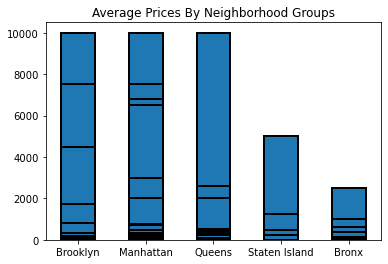

In [137]:
plt.title("Average Prices By Neighborhood Groups")

by_group = data.neighbourhood_group
prices = data.price

plt.bar(by_group, prices, width=0.50, edgecolor='k', linewidth=2)
plt.xlabel(by_group)
plt.ylabel(prices)

plt.yticks(ticks=[x*10 for x in range(11)])

plt.show()

In [140]:
type(by_group)



pandas.core.series.Series

In [ ]:
# Which neighbor hood group has the highest total price?


In [ ]:
#Which top 5 hosts have the highest total price?


In [ ]:
# Who currently has no (zero) availability with a review count of 100 or more?



In [ ]:
# What host has the highest total of prices and where are they located?



In [ ]:
# When did Danielle from Queens last receive a review?



## Further Questions

1. Which host has the most listings?

2. How many listings have completely open availability?

3. What room_types have the highest review numbers?

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

In [ ]:
# Answer One:
# The top ten busiest hosts are:
# 1. Sonder (NYC)
# 2. Blueground
# 3. Kara
# 4. Kazuya
# 5. Sonder
# 6. Jeremy & Laura
# 7. Corporate Housing
# 8. Ken
# 9. Pranjal
# 10. Mike

# I based this on the assumption that the hosts with the highest number of listings and availabilities are the busiest.

In [ ]:
# Answer Two:
# There are five neighborhood (English spelling) groups available, and the Manhattan group shows up the most.

In [ ]:
# Answer Three:
# No, private rooms are not most popular in Manhattan; they are most popular in Brooklyn.

In [ ]:
# Answer Four:
# The top ten busiest hosts BY REVIEWS are:
# 1. John
# 2. Jennifer
# 3. Elisabeth
# 4. LisaRoxanne
# 5. Laura
# 6. Sabrina
# 7. Marisol
# 8. Ilgar & Aysel
# 9. Taz
# 10. Christophe